<h2>Creando funciones necesarias para las clases y métodos</h2>

In [1]:
#import numpy as np # Importando Numpy porque dependemos de ella.
import math
import numpy as np
from time import sleep


#Todas las funciones están pensadas para ser implementadas sobre arrays de Numpy
def identity(x):
    return x

def identityderiv(x):
    return np.ones(x.shape)

def relu(x):
    return np.maximum(0,x)

#def relu(x):
#    return (x>=0)*x         #Problemas con esto

def reluderiv(x):
    return (x>=0)*1        #Problemas con esto

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoidderiv(x):
    s = sigmoid(x)       
    s_1 = 1-s     
    return s*s_1
### Por el momento esta red neuronal usará solamente la MSE como función de costos, 
#   en el futuro se considerará ampliarla para que pueda ser entrenada usando otras funciones de costo.

<h2> Creando clase para layers </h2>

In [10]:
## CLASE PARA CREAR CAPAS 
class layer:      #¿Hará falta una capa para nodos?
    def __init__(self,tipo,datos,activacion):
        self.tipo = tipo
        self.activacion = activacion
        self.input = datos
        activ_expr = activacion+'('+'datos'+')'
        self.valor = eval(activ_expr)
        
    def deriv(self):     
        activprim_expr = self.activacion+'deriv('+'self.input'+')'
        self.derivada = eval(activprim_expr)
        return self.derivada
    
    def dim(self):
        return self.valor.shape
    
    def __str__(self):
        return str(self.valor)

In [3]:
# Pruebas para ver que funcione la clase
prueba = np.array([1,5,-48,-7,8,9,-55,0,0.0001,454,-888])
prueba.shape = (1,11)
layer_prueba = layer('none',prueba,'identity')
print(layer_prueba)
#print(layer_prueba.deriv())

[[ 1.00e+00  5.00e+00 -4.80e+01 -7.00e+00  8.00e+00  9.00e+00 -5.50e+01
   0.00e+00  1.00e-04  4.54e+02 -8.88e+02]]


<h2> Creando la clase red neuronal </h2>

In [25]:
class NN_modified:                         
    def __init__(self,size):
        self.info = [['input',size,'identity']] 
        self.WEIGHTS = []   #Atributo de los pesos
        l=layer('input',np.random.random((1,size)),self.info[0][2])
        self.LAYERS = [l]
        self.DELTAS = []    
    
    def add_layer(self,type,size,activation):   #Método para agregar capas, con cada capa se agrega una nueva matriz de pesos y un delta
        c = len(self.LAYERS)
        layer_W = layer(type, np.random.random((1,size)),activation)
        self.LAYERS.append(layer_W)
        self.WEIGHTS.append(0.2*np.random.random((self.LAYERS[c-1].dim()[1], size))-0.1) #Interesante forma de inizializar los pesos.
        layer_delta = layer(type, np.random.random((1,size)),activation)
        self.DELTAS.append(layer_delta)
    
    def predict(self,X):    #Método para usar el modelo después del entrenamiento
        prediction = X.copy() 
        for j in range(len(self.WEIGHTS)):
            a = prediction.dot(self.WEIGHTS[j])
            L = layer(self.LAYERS[j+1].tipo,a,self.LAYERS[j+1].activacion)  
            prediction = L.valor
        return prediction
    
    def train(self,X,Y,alpha,iterations):  #Rutina de entrenamiento
        data_size = len(X)
        for j in range(iterations):
            error,preds = (0.0,0)
            for i in range(data_size):
                
                ####FORWARDPASS
                self.LAYERS[0] = layer('input',X[i:i+1],'identity')
                for k in range(len(self.WEIGHTS)):
                    z_values = self.LAYERS[k].valor.dot(self.WEIGHTS[k])
                    a_values = layer(self.LAYERS[k+1].tipo,z_values,self.LAYERS[k+1].activacion)
                    self.LAYERS[k+1] = a_values
                #END FORWARDPASS
                
                #Algunas métricas
                error += np.sum((Y[i:i+1]-self.LAYERS[len(self.WEIGHTS)].valor)**2)
                #preds += int(np.argmax(self.LAYERS[len(self.WEIGHTS)].valor) == np.argmax(Y[i:i+1]))
                #
                
                ## Actualizando deltas
                self.DELTAS[len(self.DELTAS)-1] = (Y[i:i+1]-self.LAYERS[len(self.DELTAS)].valor
                )*self.LAYERS[len(self.DELTAS)].deriv()
                for k in range(len(self.DELTAS)-2,-1,-1):
                    self.DELTAS[k] = self.DELTAS[k+1].dot(self.WEIGHTS[k+1].T)*self.LAYERS[k+1].deriv()
                #Fin de actualización de deltas
                
                #### BACKWARDPASS
                for k in range(len(self.WEIGHTS)-1,-1,-1):
                    self.WEIGHTS[k] += alpha * self.LAYERS[k].valor.T.dot(self.DELTAS[k])
            #Mostrando el progreso del entrenamiento        
            print("\rI",f" :{j+1}/{iterations} "," Error asociado: ",error/data_size,
                  sep='',end='',flush=True)

<h3> Implementando un autoencoder </h3>

In [58]:
np.random.seed(94)

from keras.datasets import mnist

(x_train,y_train), (x_test,y_test) = mnist.load_data()
images, labels  = (x_train[0:1000].reshape(1000,28**2)/255,y_train[0:1000])
one_hot_labels = np.zeros((len(labels),10))

for i,j in enumerate(labels):
    one_hot_labels[i][j] = 1
labels = one_hot_labels

lr,iterations,hidden_size,pixels_per_image,num_labels = (0.005,350,40,784,10)   #Hyperparameters for fun

In [59]:
autoencoder = NN_modified(pixels_per_image)
autoencoder.add_layer('hidden encoder',size = 80,activation='relu')

autoencoder.add_layer('hidden encoder',size = 60,activation='sigmoid')

autoencoder.add_layer('hidden encoder',size = 30,activation='relu')

autoencoder.add_layer('hidden encoder',size = 15,activation='identity')

autoencoder.add_layer('hidden encoder',size = 7,activation='identity')

autoencoder.add_layer('hidden encoder',size = 3,activation='relu')

#autoencoder.add_layer('hidden decoder',size = 3,activation='sigmoid')

autoencoder.add_layer('hidden decoder',size = 7,activation='relu')

autoencoder.add_layer('hidden encoder',size = 15,activation='relu')

autoencoder.add_layer('hidden encoder',size = 30,activation='sigmoid')

autoencoder.add_layer('hidden encoder',size = 60,activation='relu')

autoencoder.add_layer('hidden encoder',size = 80,activation='relu')

autoencoder.add_layer('output encoder',size = pixels_per_image,activation='sigmoid')

In [60]:
#for layer in autoencoder.LAYERS:
#   print(layer.tipo,layer.activacion,layer.dim())

In [61]:
autoencoder.train(images,images,0.001,500)

I :500/500  Error asociado: 51.695228420410545

In [62]:
##Test images from MNIST dataset for model validation and hyperparameter tunning
test_images = x_test.reshape(len(x_test),28**2)/255
test_labels = np.zeros((len(y_test),10))
for i,j in enumerate(y_test):
    test_labels[i][j] = 1

In [63]:
import matplotlib.pyplot as plt

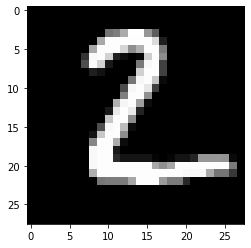

In [85]:
test_0 = test_images[1].reshape([28,28])
#print(test_0)

plt.imshow(test_0,cmap='gray')

In [86]:
intento = autoencoder.predict(test_images[1])

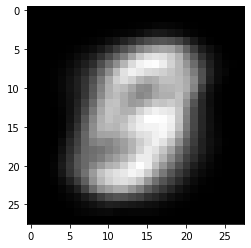

In [87]:
test_intento = intento.reshape([28,28])
plt.imshow(test_intento,cmap='gray')

In [2]:
intento = np.array([1,-9.0,88,0,-7,55])
print(relu(intento))
print(relu2(intento))

[ 1. -0. 88.  0. -0. 55.]
[ 1.  0. 88.  0.  0. 55.]


In [3]:
def reluder(x):
    return np.heaviside(x,0)

In [6]:
print(type(reluder(intento)))
print(type(reluderiv(intento)))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
